In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import pandas as pd

In [2]:
query = "playstation+5"
my_url = 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=playstation+5&_sacat=0&LH_TitleDesc=0&_odkw=ps5&_osacat=0'.format(query)
my_url

'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=playstation+5&_sacat=0&LH_TitleDesc=0&_odkw=ps5&_osacat=0'

In [3]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

page_soup = soup(page_html, 'html.parser')

In [4]:
divs = page_soup.findAll('div',{'class':'s-item__details clearfix'})
prices = []

for PS5 in divs: 
    price = PS5.find('span',{'class':"s-item__price"})
    price = price.text[1:]
    price = price.replace(',','')
    prices.append(price)


prices = pd.to_numeric(prices,errors='coerce')
prices

array([ 20.  , 809.95, 749.99, 749.  , 799.  , 799.95, 460.  , 778.  ,
       809.99, 799.99, 749.  , 740.  , 739.99, 670.  , 809.  , 734.99,
       779.  , 525.  , 649.99, 590.  , 300.  , 449.  , 779.  , 730.  ,
       749.99, 595.  , 655.  , 849.99, 550.  , 679.  , 659.  , 749.99,
       789.  , 734.99, 640.  , 779.  , 709.99, 599.99, 770.  , 879.99,
       689.99, 710.  , 809.95, 739.  , 712.  , 499.  , 700.  , 748.99,
       700.  , 489.  , 768.  , 689.99, 650.  , 590.  , 620.  , 599.99,
       620.  , 660.  , 201.5 , 344.56, 550.  , 399.95, 415.  , 620.  ,
       729.95, 645.  , 570.  , 614.  , 649.99, 349.  , 675.  , 730.  ,
       710.  , 600.  , 784.95, 809.  ])

Text(0, 0.5, 'Price in USD')

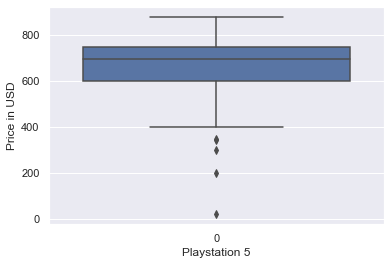

In [5]:
import seaborn as sns
sns.set()
box = sns.boxplot(data=prices)
box.set_xlabel("Playstation 5")
box.set_ylabel("Price in USD")

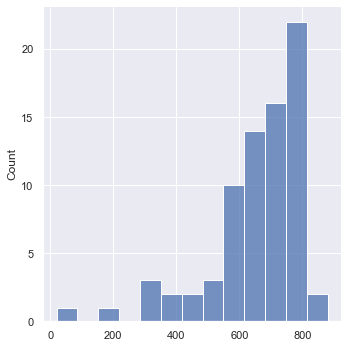

In [6]:
hist = sns.displot(data=prices)